# Predicting Student Performance

# Objective:
Build a Decision Tree Classifier to predict whether a student will
pass or fail based on demographic and academic features.

This is a real-world-like problem where you can use Decision Trees
to make predictions and understand key factors.

# Dataset:
you can use the "Student Performance Dataset" from kaggle or UCI:

Contains features like:

school → student's school

sex → male/female

age → numerical

studytime → weekly study hours

failures → past class failures

absences → number of school absences

G1, G2, G3 → grades (you can define pass/fail based on final grade)


In [9]:
# import the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# step1 : load and explore the data

In [10]:

df=pd.read_csv('/home/rgukt/datasets/student-mat.csv' ,sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
df.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

In [13]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


# Step2 : Preprocessing the data


In [14]:
# 1.Handling the missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
#If the missing values exists you can fill or drop them 

# Fill missing numerical values with the median 
for col in df.select_dtypes(include='int64').columns:
    df[col].fillna(df[col].median(),inplace=True)
    

In [16]:
#Filling missing categorical values with the mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode(),inplace=True)

In [17]:
# Note:Decision trees doesnt require feature scaling but handling missing values is essential

In [18]:
#2.Encode categorical Features

In [19]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [20]:
# Use the label encoder to convert these categories into numbers
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

In [21]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6


In [22]:
#3. Decide what you want to predict .
#For this project:pass/fail based on final grade g3

In [23]:
df['pass_fail']=df['G3'].apply(lambda x:1 if x>=10 else 0)

In [24]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1


In [25]:
df.drop(['G1','G2','G3'],axis=1,inplace=True)

In [26]:
#4. Separate Features and Target 

In [27]:
X=df.drop('pass_fail',axis=1) #All input features
y=df['pass_fail']             #target

In [28]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass_fail
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0


# Step 3: Train/Test Split & Basic Decision Tree

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [30]:
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred=dt_model.predict(X_test)

In [32]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\n Confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("\n Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.7088607594936709

 Confusion matrix:
 [[13 14]
 [ 9 43]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.75      0.83      0.79        52

    accuracy                           0.71        79
   macro avg       0.67      0.65      0.66        79
weighted avg       0.70      0.71      0.70        79



# Step 4: Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[2,3,4,5,6,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

In [34]:
grid_search=GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    n_jobs=-1,          # Use all CPU cores for speed
    scoring='accuracy'  # Optimize for accuracy
    
)

In [35]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [36]:

# best_params_ → prints the combination of hyperparameters that gave best accuracy
print('Best parameters:',grid_search.best_params_)

#best_estimator_ → gives the actual trained model with those parameters
best_model = grid_search.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [37]:
y_pred_best=best_model.predict(X_test)
print('Tuned Model Accuracy:',accuracy_score(y_test,y_pred_best))
print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred_best))
print('\n Classification Report:\n',classification_report(y_test,y_pred_best))

Tuned Model Accuracy: 0.6708860759493671

 Confusion Matrix:
 [[ 1 26]
 [ 0 52]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07        27
           1       0.67      1.00      0.80        52

    accuracy                           0.67        79
   macro avg       0.83      0.52      0.44        79
weighted avg       0.78      0.67      0.55        79



# Step 5:Model Evaluation and Interpretation

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7088607594936709

Confusion Matrix:
 [[13 14]
 [ 9 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        27
           1       0.75      0.83      0.79        52

    accuracy                           0.71        79
   macro avg       0.67      0.65      0.66        79
weighted avg       0.70      0.71      0.70        79



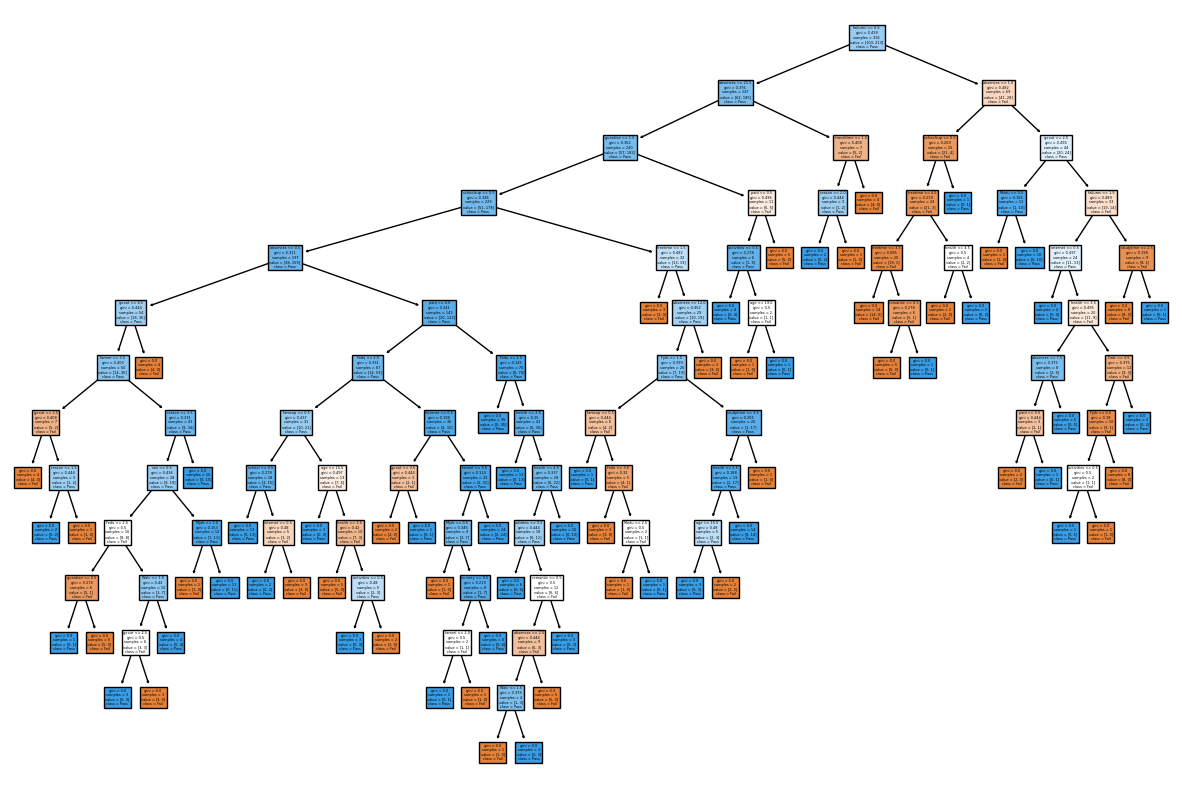

In [39]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Fail","Pass"])
plt.show()


In [40]:
import pandas as pd
feature_importances=pd.DataFrame({
    'Feature':X.columns,
    'Importance':dt_model.feature_importances_
}).sort_values(by='Importance',ascending=False)
print(feature_importances)

       Feature  Importance
29    absences    0.128216
14    failures    0.108973
25       goout    0.097771
28      health    0.069302
21    internet    0.046357
17        paid    0.045551
2          age    0.040773
7         Fedu    0.036238
23      famrel    0.033969
10      reason    0.033740
18  activities    0.029287
15   schoolsup    0.028636
24    freetime    0.028212
11    guardian    0.027750
22    romantic    0.026407
13   studytime    0.023757
9         Fjob    0.023507
8         Mjob    0.023006
16      famsup    0.022711
6         Medu    0.020296
27        Walc    0.019445
26        Dalc    0.019445
0       school    0.018725
1          sex    0.017147
3      address    0.014404
12  traveltime    0.010974
19     nursery    0.005401
5      Pstatus    0.000000
20      higher    0.000000
4      famsize    0.000000


In [41]:
#interpret the few features
sample_indices=[0,1,2]
for idx in sample_indices:
    print(f"\n Sample {idx} Prediction :{y_pred[idx]}")
    print('Feature values:')
    for feat,val in zip(X.columns,X_test.iloc[idx]):
        print(f"{feat}:{val}")


 Sample 0 Prediction :1
Feature values:
school:0
sex:1
age:17
address:1
famsize:0
Pstatus:1
Medu:2
Fedu:1
Mjob:2
Fjob:2
reason:1
guardian:1
traveltime:2
studytime:1
failures:3
schoolsup:1
famsup:1
paid:0
activities:1
nursery:1
higher:0
internet:1
romantic:0
famrel:4
freetime:5
goout:1
Dalc:1
Walc:1
health:3
absences:2

 Sample 1 Prediction :1
Feature values:
school:1
sex:1
age:18
address:0
famsize:1
Pstatus:1
Medu:1
Fedu:2
Mjob:0
Fjob:3
reason:2
guardian:0
traveltime:3
studytime:1
failures:0
schoolsup:0
famsup:1
paid:1
activities:1
nursery:1
higher:0
internet:1
romantic:1
famrel:4
freetime:3
goout:3
Dalc:2
Walc:3
health:3
absences:3

 Sample 2 Prediction :0
Feature values:
school:0
sex:1
age:18
address:0
famsize:1
Pstatus:1
Medu:3
Fedu:3
Mjob:2
Fjob:3
reason:0
guardian:1
traveltime:1
studytime:2
failures:1
schoolsup:0
famsup:1
paid:0
activities:0
nursery:1
higher:1
internet:1
romantic:1
famrel:4
freetime:3
goout:3
Dalc:1
Walc:3
health:5
absences:8


# Step 6:Feature Importance
This helps you understand which factors (like G1, G2, studytime, absences) affect the student’s final result most strongly.

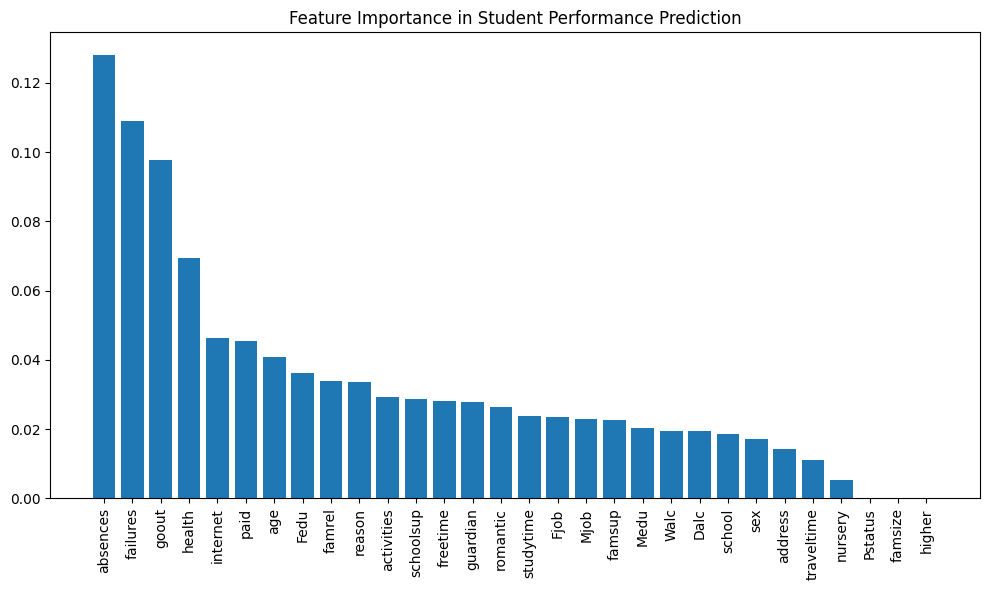

In [42]:
import numpy as np

# Get feature importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance in Student Performance Prediction")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.savefig("/home/rgukt/Desktop/student-performance-decision-tree/results/feature_importance.png")
plt.show()

In [43]:
# Print ranked feature importance
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]:.3f})")

1. absences (0.128)
2. failures (0.109)
3. goout (0.098)
4. health (0.069)
5. internet (0.046)
6. paid (0.046)
7. age (0.041)
8. Fedu (0.036)
9. famrel (0.034)
10. reason (0.034)
11. activities (0.029)
12. schoolsup (0.029)
13. freetime (0.028)
14. guardian (0.028)
15. romantic (0.026)
16. studytime (0.024)
17. Fjob (0.024)
18. Mjob (0.023)
19. famsup (0.023)
20. Medu (0.020)
21. Walc (0.019)
22. Dalc (0.019)
23. school (0.019)
24. sex (0.017)
25. address (0.014)
26. traveltime (0.011)
27. nursery (0.005)
28. Pstatus (0.000)
29. famsize (0.000)
30. higher (0.000)


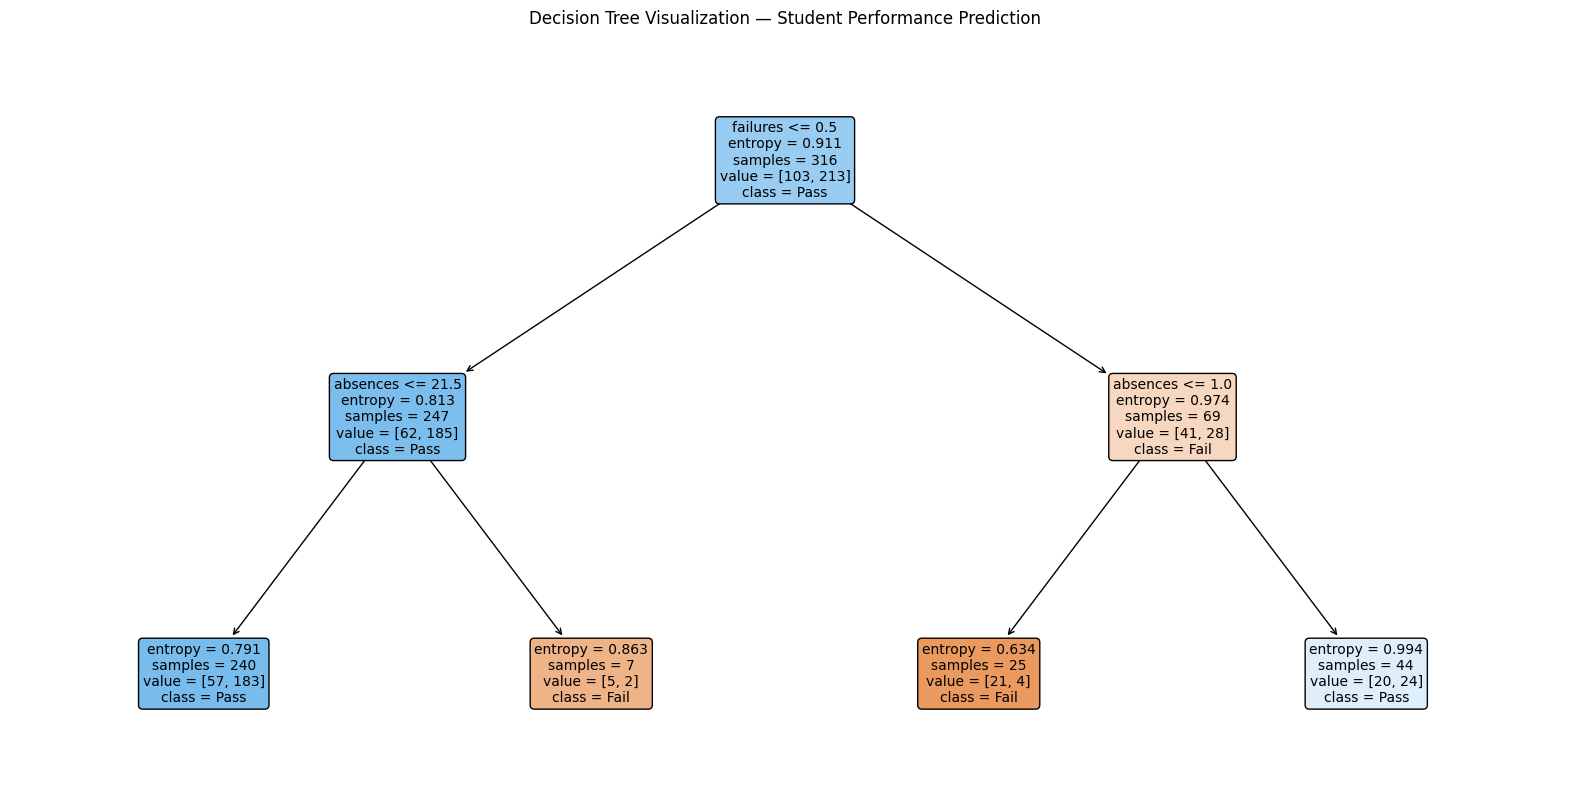

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
    best_model, 
    filled=True, 
    feature_names=X.columns, 
    class_names=["Fail", "Pass"], 
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization — Student Performance Prediction")
plt.savefig("/home/rgukt/Desktop/student-performance-decision-tree/results/tree_visualization.png")  
plt.show()